### 0. Computer vision libraries in pytorch
* [`torchvision`] base domain library for Pytorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` -get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` -functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - base dataset class for pytorch
* `torch.utils.data.DataLoader` - creates a python iterable over a dataset

In [ ]:
#import Pytorch
import torch
from torch import nn
#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
#import matplotlib for visualization
import matplotlib.pyplot as plt
#check versions
print(torch.__version__)
print(torchvision.__version__)


1.13.1+cu116
0.14.1+cu116


###1. getting datasets
* thedataset we'll be using is FashionMNIST from torchvision.datasets

In [ ]:
#Setup training data
from torchvision import datasets
train_data= datasets.FashionMNIST(
    root="data", #where to download data to ?
    train=True, #do we want the training dataset ?
    download=True, #dowe want to download yes/no ?
    transform=torchvision.transforms.ToTensor(), #how do we want to transform the data
    target_transform=None #how do we want to transform the labels/targets?
)

test_data= datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data) , len(test_data)

(60000, 10000)

In [ ]:
#see the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
#check the shape of our image
print(f'Image shape: {image.shape} -> [color channel, height, width]')
print(f'Image Label : {class_names[label]}')

Image shape: torch.Size([1, 28, 28]) -> [color channel, height, width]
Image Label : Ankle boot


###Visualizing our data

image shape:torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

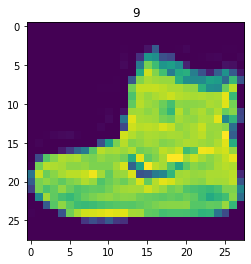

In [ ]:
import matplotlib.pyplot as plt
image,label =train_data[0]
print(f'image shape:{image.shape}')
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

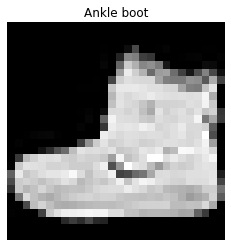

In [ ]:
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)

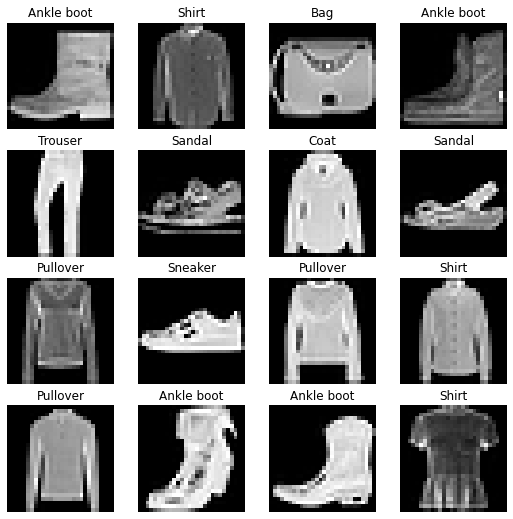

In [ ]:
#plot more images
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

##do you think these itemsof clothing (images) could be modeled with pure linear lines or do you think we'll need non-linearities ?

#2. Prepare the DataLoader
right now our data is in the form of PyTorch Datasets.

Dataloader turns our dataset into pytorch iterable.

More specifically we want to turn our data into batches(or mini batches).

why would you do this ?
1. it is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 imagesat a time (batch size of 32).
2. it gives our neural network  more chance to update its gradients per epoch. 

In [ ]:
from torch.utils.data import DataLoader
#setup the batch size hyperparameter
BATCH_SIZE=32
#turn datasets into iterables (batches)
train_dataloader= DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=False)
test_dataloader=DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f4821813310>,
 <torch.utils.data.dataloader.DataLoader at 0x7f48218139a0>)

In [ ]:
 #lets checkout what we've creates
print(f'Dataloaders: {train_dataloader, test_dataloader}')
print(f'length of train_dataloader : {len(train_dataloader)}')
print(f'length of test dataloader :{len(test_dataloader)}')

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f4821813310>, <torch.utils.data.dataloader.DataLoader object at 0x7f48218139a0>)
length of train_dataloader : 1875
length of test dataloader :313


In [ ]:
#checkout whats inside the training dataloader
train_features_batch , train_labels_batch=next(iter(train_dataloader))
train_features_batch.size() , train_labels_batch.size()

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size: torch.Size([1, 28, 28])
label: 7 , label size torch.Size([])


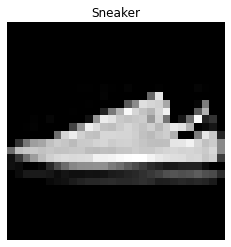

In [ ]:
#show a sample
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"image size: {img.shape}")
print(f'label: {label} , label size {label.shape}')

###3. build a baseline model
when starting to build a series of machine learning modeling experiments, its best practice to start with a baseline model.

A baseline model is a simple model you will try andimprove upon the subsequent model/experiments.

in other words : start simply and add complexity when necessary

In [ ]:
 #create a flatten layer
flatten_model=nn.Flatten()

#get a single sample
x= train_features_batch[0]

#flatten the sample
output=flatten_model(x) #perform the forward pass

#print out what happened
print(f'Shape before flattening : {x.shape} -> [color_channels, height, width]')
print(f'shape after flattening: {output.shape} -> [color_channels, height*width ]')

Shape before flattening : torch.Size([1, 28, 28]) -> [color_channels, height, width]
shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width ]


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
#setu^p a model with input parameters
model_0=FashionMNISTModelV0(input_shape=784, #this is after flattening the 28 *28 input tensor image
                            hidden_units=10, #how many units in the hidden layer
                            output_shape=len(class_names) #one for every class
                            ).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x= torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

##3.1 Setup a loss , optimizer and evaluation metric
 * loss function:  since we are working with multi-class data, our  loss function will be `nn.CrossEntropyLoss()`
 * Optimizer - our optimizer `torch.optim.SGD()` (stachastic gradient descent)
 * evaluation metric - since we are workig on a classification problem lets use accuracy as our evaluation metric 

In [ ]:
import requests
from pathlib import Path
#download a helper function from learn Pytorch repo
if Path('helper_functions.py').is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("downloading the helper file")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)


downloading the helper file


In [ ]:
#import accuracy metric
from helper_functions import accuracy_fn

#setup a loss fn and an optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

###3.2 creating a function to time our experiments
Machine learning is very experimental.

  Two of the main things you will want to track are:

    1. model's performance (loss, accuracy values ..etc)
    2. how fast it runs



In [ ]:
from timeit import default_timer as timer
def print_train_time(
    start:float,
    end:float,
    device:torch.device=None):
  """ Prints diffrence between start and end time. """
  total_time=end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

### 3.3 Creating a training loop and training a model on batches of data
1. loop through epochs
2. loop through training batches, perform training steps, calculate the train loss per batch.
3. loop through testing batches, , perform testing steps, calculate the test loss per batch.
4. print out whats happening.
5. time it all(for fun)

In [ ]:
#import tqdm for progressbar
from tqdm.auto import tqdm 
#set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu=timer()

#set the number of epochs (we'll keep this small for faster training time)
epochs=3
#create training and test loop
for epoch in tqdm(range(epochs)):
  print(f'epoch: {epoch} \n ------')
  ###Training
  train_loss=0
  #add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    #forward pass
    y_pred=model_0(X)

    #calculate the loss(per batch)
    loss=loss_fn(y_pred,y)
    train_loss+=loss # accumulate a train loss
    #optimizer zero grad
    optimizer.zero_grad()

    #loss backward
    loss.backward()

    #5. optimizer step
    optimizer.step()
    #print out whats happening 
    if batch % 400 == 0:
      print(f" looked at {batch*len(X)}/{len(train_dataloader.dataset)}")
  #devide total train  loss by l length of train dataloader
  train_loss/=len(train_dataloader)
  ###Testing
  test_loss, test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      #forward pass
      test_pred= model_0(X_test)
      #calculate the loss (accumulatively)
      test_loss+=loss_fn(test_pred,y_test)
      #calculate the accuracy
      test_acc+=accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
    #calculate the test loss average per batch
    test_loss/=len(test_dataloader)
    # Divide total accuracy by length of test dataloader (per batch)
    test_acc /= len(test_dataloader)

  #print out whats happening
  print(f'\n Train loss {train_loss:.4f} | test loss: {test_loss:.4f}, test acc : {test_acc:.4f}')
#calculate training time
train_time_end_on_cpu=timer()
total_time_train_model_0=print_train_time(start=train_time_start_on_cpu,
                                          end=train_time_end_on_cpu,
                                          device=str(next(model_0.parameters()).device)
                                          )

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0 
 ------
 looked at 0/60000
 looked at 12800/60000
 looked at 25600/60000
 looked at 38400/60000
 looked at 51200/60000

 Train loss 0.5886 | test loss: 0.5544, test acc : 80.2716
epoch: 1 
 ------
 looked at 0/60000
 looked at 12800/60000
 looked at 25600/60000
 looked at 38400/60000
 looked at 51200/60000

 Train loss 0.4743 | test loss: 0.5186, test acc : 81.9888
epoch: 2 
 ------
 looked at 0/60000
 looked at 12800/60000
 looked at 25600/60000
 looked at 38400/60000
 looked at 51200/60000

 Train loss 0.4530 | test loss: 0.5032, test acc : 82.4780
Train time on cpu: 36.785 seconds


##4. Make prediction and get Model0 results



In [ ]:
torch.manual_seed(42)
def eval_model(
    model:torch.nn.Module,
    data_loader: torch.utils.data.dataloader,
    loss_fn:torch.nn.Module,
    accuracy_fn,
    device:torch.device):
  """Returns a dictionary containing the results of model predicting on dataloader."""
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      #X and y on the device
      X,y=X.to(device),y.to(device)
      #make predictions
      y_pred=model(X)

      #accumulate the loss and acc values per batch
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    #scale loss and accuracy to find the average loss/acc per batch 
    loss/=len(data_loader)
    acc/=len(data_loader)
  return {
      "model_name":model.__class__.__name__, #only works when a model was created with a class
      "model_loss":loss.item(),
      "model_accuracy": acc
  }

#calculate modelà results on test data sets
model_0_results=eval_model(
    model=model_0,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device='cpu'

)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5031648278236389,
 'model_accuracy': 82.47803514376997}

###5. Setup a device agnostic code (for using GPU if there is one)

In [ ]:
y_pred.ndim

2

In [ ]:
!nvidia-smi

Tue Mar 14 10:47:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
torch.cuda.is_available()

True

In [ ]:
#setup a device agnostic code 
import torchvision
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

###6.1 Model 1: building a better model with non-linearity
we learned abt the power of non-linearity in notebook 02

In [ ]:
#create a model with non-linear and linear 
class FashionMNISTModelV1(nn.Module):
  def __init__(
      self,
      input_shape:int,
      hidden_units:int,
      output_shape: int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(), #flatten inputs into a singlevector
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )
  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)

In [ ]:
#xreate an instance of model_1
torch.manual_seed(42)
model_1=FashionMNISTModelV1(
    input_shape=784, #this is the output of the flatten after 28*28 image goes in
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

In [ ]:
next(model_1.parameters()).device

device(type='cuda', index=0)

###setup a loss , optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss() #measures how wrong our model is
optimizer=torch.optim.SGD(params=model_1.parameters(), #tries to update our model's parameters to reduce the loss
                          lr=0.1
                          )

###functionizing training and evaluating/testing loop
let's create a function for:
1. training loop -`train_step()`
2. testing loop - `test_step()` 



In [ ]:
def train_step(
    model:torch.nn.Module,
    data_loader:torch.utils.data.DataLoader,
    loss_fn :torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn,
    device:torch.device=device):
   """Performs a training with model trying to learn on data_loader"""
   train_loss, train_accuracy=0,0
   #put model into training mode
   model.train()
   #add a loop to loop through the training batches
   for batch,(X,y) in enumerate(data_loader):
     #put data on target device
     X,y=X.to(device),y.to(device)
     #1.forward pass (outputs the raw logits from the model)
     y_pred=model(X)
     #2.calculate the loss and accuracy (per batch)
     loss=loss_fn(y_pred,y)
     train_loss+=loss #accumulate train loss
     train_accuracy+=accuracy_fn(y_true=y,
                            y_pred=y_pred.argmax(dim=1)) #go from logits -> prediction labels

     #3.optimizer zero grad
     optimizer.zero_grad()
     #4.Loss Backward
     loss.backward()
     #optimizer step (update the models parameters once per batch)
     optimizer.step()
   #Divide total train loss and acc by length of data_loader
   train_loss/=len(data_loader)
   train_accuracy/=len(data_loader)
   print(f'Train Loss: {train_loss:.5f} | Train acc : {train_accuracy:.2f}')

In [ ]:
def test_step(
    model: torch.nn.Module,
    data_loader:torch.utils.data.DataLoader,
    loss_fn:torch.nn.Module,
    accuracy_fn,
    device:torch.device=device):
  """Performs a testing loop step on model going over data_loader"""
  test_loss,test_acc=0,0

  #put the model in eval mode
  model.eval()
  #turn on inference mode context manager
  with torch.inference_mode():
     for X,y in data_loader:
       #Send the data to target device
       X,y=X.to(device),y.to(device)
       #1.forward pass
       test_pred=model(X)
       #2.calculate the loss/acc
       test_loss+=loss_fn(test_pred,y)
       test_acc +=accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) #go from logits to prediction labels
    #Adjust metrics and print out
     test_loss/=len(data_loader)
     test_acc/=len(data_loader)
     print(f"Test loss: {test_loss:.5f} | Test acc {test_acc:.2f} %\n")

In [ ]:
torch.manual_seed(42)
#measure time
from timeit import default_timer as timer
train_time_start_on_gpu=timer()
#set epochs
epochs=3
#create an optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f'Epoch : {epoch} \n ----')
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_on_gpu=timer()
total_train_time_on_gpu=print_train_time(start=train_time_start_on_gpu,
                                         end=train_time_end_on_gpu,
                                         device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0 
 ----
Train Loss: 1.04251 | Train acc : 62.67
Test loss: 0.97815 | Test acc 63.94 %

Epoch : 1 
 ----
Train Loss: 0.90096 | Train acc : 66.78
Test loss: 0.94511 | Test acc 65.02 %

Epoch : 2 
 ----
Train Loss: 0.87287 | Train acc : 67.47
Test loss: 0.91733 | Test acc 66.16 %

Train time on cuda: 36.775 seconds


In [ ]:
total_time_train_model_0

36.78476258400002

In [ ]:
#get model_1_results dictionary
model_1_results=eval_model(
    model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.9173313975334167,
 'model_accuracy': 66.16413738019169}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5031648278236389,
 'model_accuracy': 82.47803514376997}

###Model2 : Building a convolutional neural network(CNN)
CNN's are also known as ConvNets.
CNN's are known for their capabilities to find pattern in visual data

In [ ]:
#Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TynyVGGmodel from the explainer website
  """
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(
            in_channels=input_shape,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1 #bcs be can set these manually we refer to them as hyperparameters 
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(
              in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1,
              padding=1),
        nn.ReLU(),
        nn.Conv2d(
              in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1,
              padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, #there is a trick to calculate this
                  out_features=output_shape)
    )
  def forward(self,x):
    x=self.conv_block_1(x)
    #print(x.shape)
    x=self.conv_block_2(x)
    #print(x.shape)
    x=self.classifier(x)
    #print(x.shape)
    return x


In [ ]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)

In [ ]:
#passing some data through our model
model_2(image.unsqueeze(0).to(device))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], device='cuda:0', grad_fn=<AddmmBackward0>)

###7.1 Stepping through nn.Conv2D

In [ ]:
torch.manual_seed(42)
#create a batch of images
images=torch.randn(size=(32,3,64,64))
test_image=images[0]
images.shape, test_image.shape

(torch.Size([32, 3, 64, 64]), torch.Size([3, 64, 64]))

In [ ]:
torch.manual_seed(42)
#create a single conv2d layer
conv_layer= nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=3,
                      stride=1,
                      padding=1)
conv_output=conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

##Stepping through NN maxpool 2D

In [ ]:
#create a sample nn.MaxPool2D layer
max_pool_layer=nn.MaxPool2d(kernel_size=2)

#pass through just the conv layer
test_image_through_conv=conv_layer(test_image)
print(f' the shape og the test image only through the conv layer :{test_image_through_conv.shape}')

#pass data through the max poollayer
test_image_through_conv_and_max_pool=max_pool_layer(test_image_through_conv)
test_image_through_conv_and_max_pool.shape

 the shape og the test image only through the conv layer :torch.Size([10, 64, 64])


torch.Size([10, 32, 32])

In [ ]:
torch.manual_seed(42)
#create a random tensor with a simular number of dimension to our image
random_tensor=torch.randn(size=(1,1,2,2))
print(f'\n random tensor :\n{random_tensor}')
print(f'random tensor shape : {random_tensor.shape}')
#create a maxpool layer
max_pool_layer=nn.MaxPool2d(kernel_size=2)

#pass our random tensor through our maxpool layer
max_pool_tensor=max_pool_layer(random_tensor)
print(f'\n maxpool tensor: \n{max_pool_tensor}')
print(f'\n maxpool tensor shape : {max_pool_tensor.shape}')


 random tensor :
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
random tensor shape : torch.Size([1, 1, 2, 2])

 maxpool tensor: 
tensor([[[[0.3367]]]])

 maxpool tensor shape : torch.Size([1, 1, 1, 1])


##7.3 Setup a loss function and optimizer for `model_2`

In [ ]:
#setup loss function/eval metrics optimizer
from helper_functions import accuracy_fn
loss_fn ==nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params=model_2.parameters(),lr=0.1)

##7.4 Training and testing `model_2` using our training and test functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
#measure time
from timeit import default_timer as timer 
train_time_start_model_2=timer()

#train and test model
epochs=3
for epoch in tqdm(range(epochs)):
  print(f'epoch: \n ---- ')
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device
             )
  test_step(
      model=model_2,
      data_loader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device)
train_time_end_model_2=timer()
total_train_time_model_2=print_train_time(start=train_time_start_model_2,end=train_time_end_model_2,device=device)
  

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 
 ---- 
Train Loss: 0.61510 | Train acc : 77.44
Test loss: 0.42592 | Test acc 84.25 %

epoch: 
 ---- 
Train Loss: 0.36572 | Train acc : 86.78
Test loss: 0.38187 | Test acc 86.04 %

epoch: 
 ---- 
Train Loss: 0.32754 | Train acc : 88.28
Test loss: 0.34439 | Test acc 87.81 %

Train time on cuda: 42.522 seconds


In [ ]:
#get model_2 Results
model_2_results=eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3443911373615265,
 'model_accuracy': 87.80950479233226}

###8. Compare model results and training time

In [ ]:
import pandas as pd
compare_results =pd.DataFrame([model_0_results,model_1_results,model_2_results])
compare_results

,model_name,model_loss,model_accuracy
0,FashionMNISTModelV0,0.503165,82.478035
1,FashionMNISTModelV1,0.917331,66.164137
2,FashionMNISTModelV2,0.344391,87.809505


In [ ]:
#add training time results to comparaison
compare_results["training_time"]=[total_time_train_model_0,total_train_time_on_gpu,total_train_time_model_2]
compare_results

,model_name,model_loss,model_accuracy,training_time
0,FashionMNISTModelV0,0.503165,82.478035,36.784763
1,FashionMNISTModelV1,0.917331,66.164137,36.774926
2,FashionMNISTModelV2,0.344391,87.809505,42.521840


Text(0, 0.5, 'model')

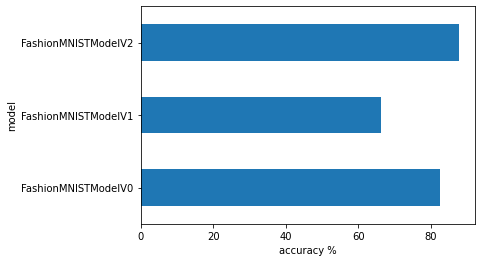

In [ ]:
#visualize our model results
compare_results.set_index("model_name")["model_accuracy"].plot(kind="barh")
plt.xlabel("accuracy %")
plt.ylabel("model")

###9. Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #prepare the sample (add a batch dimensionand pass to target device)
      sample=torch.unsqueeze(sample,dim=0).to(device)
      #forward pass (model outputs raw logits)
      pred_logit = model(sample)
      #get prediction probability (logit -> pred probability)
      pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)
      #get pred prob off the gpu for further calculation
      pred_probs.append(pred_prob.cpu())
  #stack the pred_probs to turn the list into tensor
  return torch.stack(pred_probs)

In [ ]:
import random
#random.seed(42)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)
#view the first samples shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sneaker')

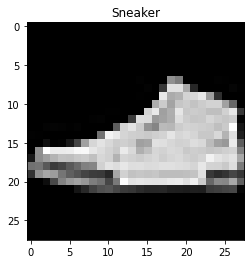

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
#make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
#view first two prediction probabilities
pred_probs[:2]

tensor([[7.8611e-06, 2.5768e-07, 2.6856e-06, 1.5389e-06, 4.7565e-06, 3.5153e-04,
         2.6305e-07, 9.9588e-01, 1.6490e-04, 3.5864e-03],
        [2.5407e-05, 2.0283e-06, 5.8837e-06, 1.4354e-06, 5.3213e-07, 1.5850e-02,
         6.8824e-07, 5.9175e-01, 4.7499e-05, 3.9232e-01]])

In [ ]:
#convert prediction prpobabilities to labels
pred_classes =pred_probs.argmax(dim=1)
pred_classes

tensor([7, 7, 9, 5, 7, 2, 1, 2, 8])

In [ ]:
test_labels,pred_classes

([7, 7, 9, 5, 7, 2, 1, 2, 8], tensor([7, 7, 9, 5, 7, 2, 1, 2, 8]))

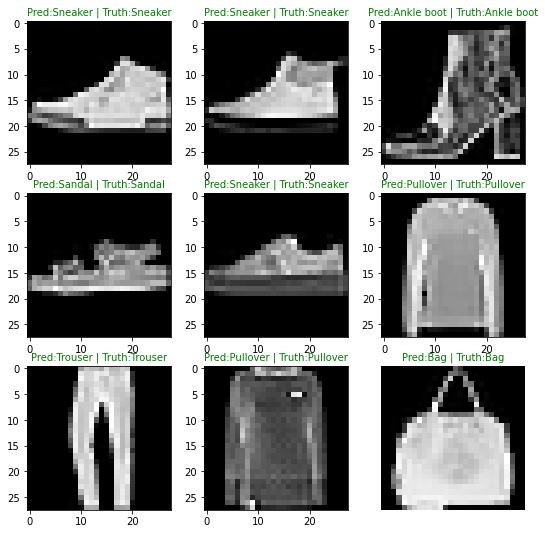

In [ ]:
#plot predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
  #create subplot
  plt.subplot(nrows,ncols,i+1)
  #plot the target image
  plt.imshow(sample.squeeze(),cmap='gray')
  #find the prediction (in text form, for exp : sandale)
  pred_label=class_names[pred_classes[i]]
  # get the truth label in a text form
  truth_label=class_names[test_labels[i]]
  #create a title for the plot
  title_text=f'Pred:{pred_label} | Truth:{truth_label}'
  #check for the equalitybetween  pred and truth and change the color of the title text
  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,c='g')
  else:
    plt.title(title_text,fontsize=10,c='r')
plt.axis(False);

##10.Making confusion matrix for further prediction evaluation
A confusion matrix is a fantastic way of avaluating your classification model visually:
1. make predictions with our trained model on the test dataset
2. make a confusion matrix `torchmetrics.ConfusionMatrix`
3. plot the confusion matrix using `mlstend.plotting.plot_confusion_matrix()`

In [ ]:
#import tqdm.auto
from tqdm.auto import tqdm 
#1. make predictions with trained model
y_preds=[]
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="making preds ......"):
    #send the data and targets to target device
    X,y=X.to(device),y.to(device)
    #do the forward pass
    y_logit=model_2(X)
    #turn predictions from logits-> predictions probabilities -> prediction labels
    y_pred=torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    #put the prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())
#concatenate list of predictions into tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor.shape


making preds ......:   0%|          | 0/313 [00:00<?, ?it/s]

torch.Size([10000])

In [ ]:
#see if required packages are installes and if not , install them...
try:
  import mlxtend,torchmetrics
  print(f'mlxtend version:{mlxtend.__version__}')
  assert int(mlxtend.__version__.split('.')[1]>=19, 'mlxtend version should be 0.19.0 or higher')
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics,mlxtend
  print(f'mlxtend version: {mlxtend.__version__}')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.1 MB/s eta 0:00:00
mlxtend version: 0.14.0


In [ ]:
y_pred_tensor.shape

torch.Size([10000])

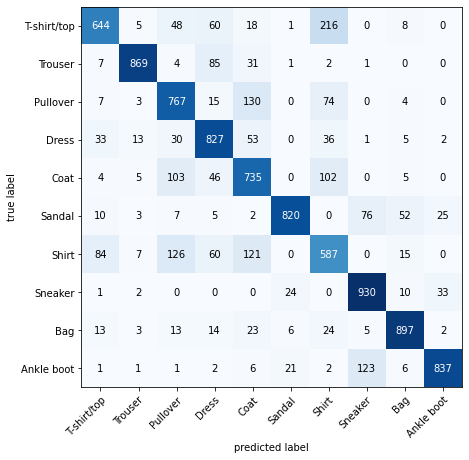

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
#setup confusion instance and compare predictions to targets
confmat=ConfusionMatrix(task='multiclass',num_classes=len(class_names))
confmat_tensor=confmat(preds=y_pred_tensor, target=test_data.targets)

#plot confusion matrix
fig, ax =plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), #matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10,7)
)


In [ ]:
from pathlib import Path
#create a model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
#create model save
MODEL_NAME= "03_PyTorch_Computer_Vision_Model_2.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

#Save the model state dict
print(f'Saving model to : {MODEL_SAVE_PATH}')
torch.save(obj=model_2.state_dict(),f=MODEL_SAVE_PATH)

Saving model to : models/03_PyTorch_Computer_Vision_Model_2.pth


In [ ]:
#create a new instance 
torch.manual_seed(42)

loaded_model_2=FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names))
#load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3443911373615265,
 'model_accuracy': 87.80950479233226}

In [ ]:
#evaluate the loaded model
torch.manual_seed(42)
loaded_model_2_results=eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3443911373615265,
 'model_accuracy': 87.80950479233226}